In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


This data set consists of Placement data of students in our campus. It includes secondary and higher secondary 
school percentage and specialization. It also includes degree specialization, type and Work experience and 
salary offers to the placed students

In [2]:
df = pd.read_csv(r'C:\Users\logic\Documents\datascience\Placement_Data_Full_Class.csv')
print(df.shape)
df.head(10)


(215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [3]:
# dropping NULL VALES
df.isnull().sum()



sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### An important observation is that we cannot drop the null values in salary because it will remove the unplaced students row so we will fill those rows with zero

C:\Users\logic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='salary'>

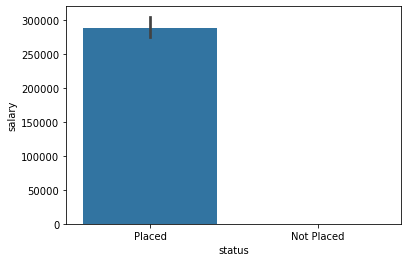

In [4]:
df['salary']=df['salary'].fillna(0)
df['salary'].head(10)
sns.barplot(df['status'],df['salary'])

# Features in data
    Data size and Restructure

In [5]:
print(df.columns.values)

['sl_no' 'gender' 'ssc_p' 'ssc_b' 'hsc_p' 'hsc_b' 'hsc_s' 'degree_p'
 'degree_t' 'workex' 'etest_p' 'specialisation' 'mba_p' 'status' 'salary']


sl_no : Serial Number

gender : Candidate gender --> Male='M',Female='F'

ssc_p : SSC (10th) Percentage

ssc_b : SSC Board of Education --> Central (or) Others

hsc_p : HSC (12th) percentage

hsc_b : HSC Board of Education --> Central/ Others

hsc_s : Specialization in HSC

degree_p : Degree Percentage

degree_t : Under Graduation (Degree type)- Field of degree education

workex : Work Experience

etest_p : Employability test percentage ( conducted by college)

specialisation : Post Graduation(MBA)- Specialization

mba_p : MBA percentage

status : Status of placement- Placed/Not placed

salary : Salary offered by corporate to candidates

In [6]:
df.dtypes
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


As it is clear that we don't need sl_no in training model or in EDA. Thus I am dropping sl_no column. Rest of them I will keep as it is.
After performing EDA I will drop other if needed

In [7]:
df=df.drop(['sl_no'],axis=1)
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


# Exploring important features

Placed        148
Not Placed     67
Name: status, dtype: int64


C:\Users\logic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

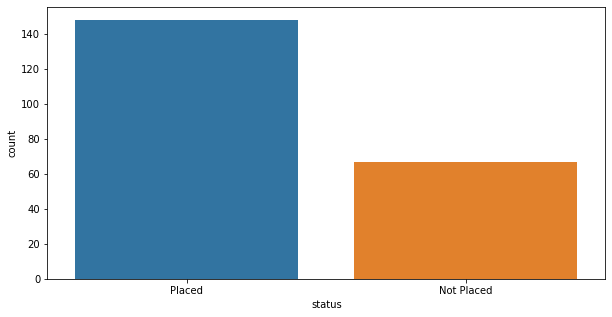

In [8]:
plt.figure(figsize=(10,5))
print(df['status'].value_counts())
sns.countplot(df['status'])

shows the number of PLACED STUDENTS AND UNPLACED STUDENTS

<AxesSubplot:ylabel='status'>

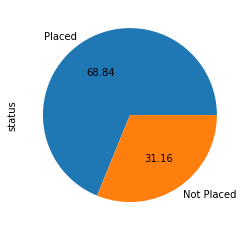

In [9]:
df['status'].value_counts().plot(kind='pie',autopct='%.2f')

In [10]:
# I created a temporary variable to store the salaries > 0 because we dont want to show the unplaced students with 0 salaries 
# in our metrics 
temp=df[df['salary']>0]

print("maximum salary = " , df['salary'].max())
print("minimum salary = ", temp.salary.min())
print("average salary = ",temp.salary.mean())

maximum salary =  940000.0
minimum salary =  200000.0
average salary =  288655.4054054054


C:\Users\logic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

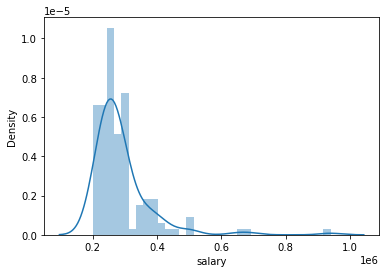

In [11]:
sns.distplot(temp.salary)
#it shows probablity distribution and skeness  

It is evident from the from the mean and min salary  that the salary data is right skewed i.e :
 -> very less people are there above the mean salary
 -> more people are there in between low to mean  

# Gender

In [12]:
print(df['gender'].value_counts())
ds = pd.DataFrame(df.groupby(['gender','status'])['status'].count())
ds

M    139
F     76
Name: gender, dtype: int64


status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100

<AxesSubplot:xlabel='gender', ylabel='count'>

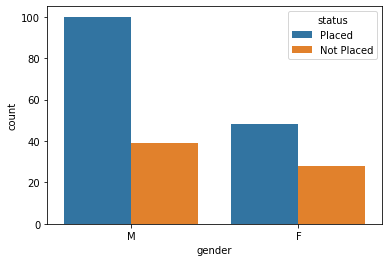

In [13]:
sns.countplot(x='gender', hue='status', data=df)

Males have high chances of getting placed compared to females

# SSC Board

In [14]:
df['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [15]:
dss = pd.DataFrame(df.groupby(['ssc_b','status'])['status'].count())
dss

status
ssc_b   status            
Central Not Placed      38
        Placed          78
Others  Not Placed      29
        Placed          70

<AxesSubplot:xlabel='ssc_b', ylabel='count'>

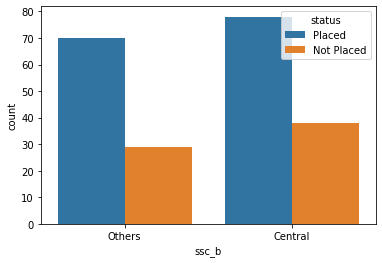

In [16]:
sns.countplot(x='ssc_b', hue='status', data=df)

# HSC Percentage

C:\Users\logic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'HSC %')

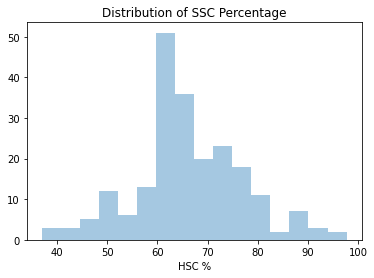

In [17]:
sns.distplot(df['hsc_p'], kde=False)
plt.title('Distribution of SSC Percentage')
plt.xlabel('HSC %')

In [18]:
df['hsc_b'].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [19]:
dhs = pd.DataFrame(df.groupby(['hsc_b','status'])['status'].count())
dhs

status
hsc_b   status            
Central Not Placed      27
        Placed          57
Others  Not Placed      40
        Placed          91

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

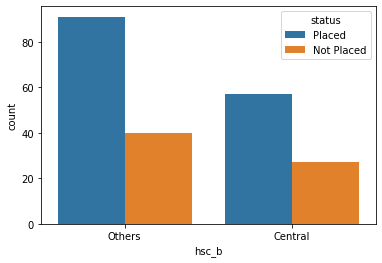

In [20]:
sns.countplot(x='hsc_b', hue='status', data=df)

Text(3.674999999999997, 0.5, 'HSC %')

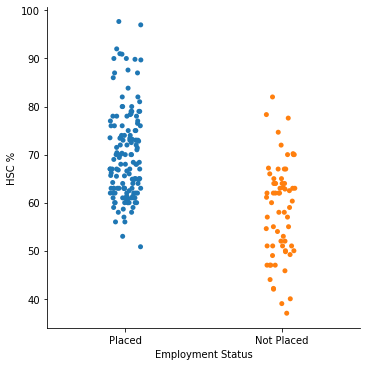

In [21]:
sns.catplot(y='hsc_p', x='status', data=df)
plt.xlabel('Employment Status')
plt.ylabel('HSC %')

# Degree Type

In [22]:
df['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [23]:
df = pd.DataFrame(df.groupby(['degree_t','status'])['status'].count())
df

status
degree_t  status            
Comm&Mgmt Not Placed      43
          Placed         102
Others    Not Placed       6
          Placed           5
Sci&Tech  Not Placed      18
          Placed          41

# Correlation between features

In [24]:
sns.pairplot(df, hue='status')

ValueError: No variables found for grid columns.

In [ ]:

df_logical = df.query('salary == 0 and ssc_p >50  and hsc_p>50 and degree_p>50 and etest_p>50 and mba_p>50 ')
df_miracle = df.query('salary == 0 and ssc_p <60  and hsc_p<60 and degree_p<60 and etest_p<60 and mba_p<60')
df_logical 

In [ ]:
# it shows that there are students with good test scores who are unemployed 

In [ ]:
df_miracle

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(df['hsc_p'],df['salary'])

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(df['degree_p'],df['salary'])

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(df['etest_p'],df['salary'])

In [ ]:
# we deduced relations among highschool , degree marks ans employability test and and see   

# Feature mapping and generation

Let's drop all unwanted columns as mentioned in above section.
SSC Board
HSC Board
HSC Specialisation
Degree Type
Salary

In [ ]:
df.drop(['ssc_b','hsc_b', 'hsc_s', 'degree_t'], axis=1, inplace=True)

##### Let's map categorical feature to numeric one. Categorical features:
##### Gender : Gender feature have male and female values. I am going to map 1 for male and 0 for female.
##### Work Experience : Work Experience feature have Yes and No values. I am going to map 0 for No and 1 for Yes.
##### Status : Status feature have Not Placed and Placed values. Again for this features I am mapping 0 for not placed and 1 for placed values.
##### Specialisation : Specialisation feature have two values Mkt&HR and Mkt&Fin. I am going to map 0 to Mkt&HR and 1 to Mkt&Fin.

In [ ]:
df["gender"] = df.gender.map({"M":1,"F":0})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [ ]:
df.head()

#   Spliting ,Modelling and PCA 

In [ ]:
# Seperating Features and Target
X = df.copy().drop(df[['status','gender','salary','workex','specialisation']], axis=1)
y = df['status']
# scale each features this, follows the same concept of Normalization and Standardization.
X_scaled = preprocessing.scale(X)

In [ ]:
X_scaled[1]

###  Now we can apply algorithms to the dataset 


In [ ]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [ ]:
X_t = pca.fit_transform(X_scaled)
X_t[1]

In [ ]:
import plotly.express as px

y_t = y.astype(str)
fig = px.scatter(x=X_t[:,0],
                 y=X_t[:,1],
                 color=y_t,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

# It is evident from the graph that the unplaced students scored less marks compared to the placed students in both of the two components

In [ ]:
import plotly.express as px
y_t = y.astype(str)
fig = px.scatter_3d(df, x=X_t[:,0], y=X_t[:,1], z=X_t[:,2],
              color=y_t)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

# This Plot shows us the dependency of 3 components.
##  We can clearly see the placed students in positive axes mostly and unplaced students on negative sides
## It is evident from the graph that the unplaced students scored less marks compared to the placed students in both of the two components

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)
X_train.shape, Y_train.shape, X_test.shape

## APPLYING LINEAR REGRESSION
Dependent variable = salary

independent variables = gender	ssc_p	ssc_b	hsc_p	hsc_b	hsc_s	degree_p	degree_t	workex	etest_p	specialisation	mba_p	
  

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()     #initiating linearregression

Xlr = df.copy().drop(df[['status','salary']], axis=1)
Ylr = df['salary']
Xlr_scaled = preprocessing.scale(Xlr)

Xlr_train, Xlr_test, Ylr_train, Ylr_test = train_test_split(Xlr_scaled, ylr, test_size=0.1)
Xlr_train.shape, Ylr_train.shape,  Xlr_test.shape ,Ylr_test.shape

In [ ]:
reg.fit(Xlr_train,Ylr_train)
Intercept=reg.intercept_
Coefficients=reg.coef_

In [ ]:
# 1 intercept and 5 coeffiecient in multiple Linear Regression
Intercept,Coefficients

In [ ]:
Ylr_pred=reg.predict(Xlr_test)
lr_accuracy = reg.score(Xlr_test, Ylr_test)
lr_accuracy

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Ylr_test,Ylr_pred))

# Applying KNN

In [ ]:
# k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, Y_test)
knn_accuracy

# Summary
## XYZ University wants to build machine learning model to know whether the student will get placed or not. So that they can provide special attention and help them to get job.

### After finding , if the student will get placed or not using KNN to predict and to get a prediction of salary we applied LR